In [30]:
import pandas as pd
from sentence_transformers import SentenceTransformer
import hdbscan
from sklearn.datasets import make_blobs
import seaborn as sns
from sklearn.cluster import DBSCAN
from datetime import datetime
import matplotlib.pyplot as plt
import umap.umap_ as umap
import umap

In [31]:
df = pd.read_csv("https://storage.googleapis.com/superlinked-notebook-user-acquisiton-analytics/user_acquisiton_data.csv")
df.drop(columns=['id'], inplace=True)
#df['signup_date'] = df['signup_date'].apply(datetime.fromtimestamp)
df = df.sort_values(by='signup_date')
df

,signup_date,ad_creative,activity
1921,1692763005,Enter the realm of gaming excellence! Join our...,0.244943
821,1692763863,Enter the realm of gaming excellence! Join our...,0.195539
1426,1692764051,Join a dynamic gaming universe where every cha...,0.237265
208,1692764125,Enter the realm of gaming excellence! Join our...,0.355125
1901,1692764227,Join a dynamic gaming universe where every cha...,0.119852
...,...,...,...
7455,1709313190,Join a dynamic gaming universe where every cha...,0.125642
6758,1709606522,Embark on your gaming journey with XYZCr$$d! J...,0.226212
5788,1709786997,Embark on your gaming journey with XYZCr$$d! J...,0.947034
6123,1709955920,Elevate your gaming experience! Upgrade now fo...,0.169624


In [32]:
model = SentenceTransformer("all-MiniLM-L6-v2")

In [33]:
sentences = list(set(df['ad_creative'])) # amúgy őszintén számomra az nagyon érdekes, mert hogyha list és set kombinációt használok akkor más eredményt kapok
embeddings = model.encode(sentences)
embeddings_df = pd.DataFrame(embeddings)
sentences_df = pd.DataFrame(sentences, columns=['ad_creative'])
embeddings_df = pd.DataFrame(embeddings)
combined_df = pd.concat([sentences_df, embeddings_df], axis=1)
combined_df = pd.merge(df, combined_df, on = 'ad_creative')
combined_df

,signup_date,ad_creative,activity,0,1,2,3,4,5,6,...,374,375,376,377,378,379,380,381,382,383
0,1692763005,Enter the realm of gaming excellence! Join our...,0.244943,0.065962,-0.054510,-0.017591,-0.088004,-0.071431,-0.005989,0.018255,...,0.038980,0.029791,0.01134,0.052116,0.003688,0.036014,0.080219,-0.056411,-0.060529,-0.009098
1,1692763863,Enter the realm of gaming excellence! Join our...,0.195539,0.065962,-0.054510,-0.017591,-0.088004,-0.071431,-0.005989,0.018255,...,0.038980,0.029791,0.01134,0.052116,0.003688,0.036014,0.080219,-0.056411,-0.060529,-0.009098
2,1692764125,Enter the realm of gaming excellence! Join our...,0.355125,0.065962,-0.054510,-0.017591,-0.088004,-0.071431,-0.005989,0.018255,...,0.038980,0.029791,0.01134,0.052116,0.003688,0.036014,0.080219,-0.056411,-0.060529,-0.009098
3,1692768125,Enter the realm of gaming excellence! Join our...,0.164160,0.065962,-0.054510,-0.017591,-0.088004,-0.071431,-0.005989,0.018255,...,0.038980,0.029791,0.01134,0.052116,0.003688,0.036014,0.080219,-0.056411,-0.060529,-0.009098
4,1692768452,Enter the realm of gaming excellence! Join our...,0.000000,0.065962,-0.054510,-0.017591,-0.088004,-0.071431,-0.005989,0.018255,...,0.038980,0.029791,0.01134,0.052116,0.003688,0.036014,0.080219,-0.056411,-0.060529,-0.009098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,1707821656,Elevate your gaming experience! Upgrade now fo...,0.242971,-0.000063,-0.005402,0.004920,-0.057131,0.012600,-0.042839,0.049234,...,0.115672,0.038509,-0.02155,0.137041,-0.006878,0.105695,0.026699,-0.008524,-0.090382,-0.019803
7996,1708308059,Elevate your gaming experience! Upgrade now fo...,1.358857,-0.000063,-0.005402,0.004920,-0.057131,0.012600,-0.042839,0.049234,...,0.115672,0.038509,-0.02155,0.137041,-0.006878,0.105695,0.026699,-0.008524,-0.090382,-0.019803
7997,1708659849,Elevate your gaming experience! Upgrade now fo...,0.774338,-0.000063,-0.005402,0.004920,-0.057131,0.012600,-0.042839,0.049234,...,0.115672,0.038509,-0.02155,0.137041,-0.006878,0.105695,0.026699,-0.008524,-0.090382,-0.019803
7998,1709225044,Elevate your gaming experience! Upgrade now fo...,0.108751,-0.000063,-0.005402,0.004920,-0.057131,0.012600,-0.042839,0.049234,...,0.115672,0.038509,-0.02155,0.137041,-0.006878,0.105695,0.026699,-0.008524,-0.090382,-0.019803


In [34]:
cluster_1_df = combined_df.drop(columns=['signup_date', 'ad_creative', 'activity'])
cluster_1_df

,0,1,2,3,4,5,6,7,8,9,...,374,375,376,377,378,379,380,381,382,383
0,0.065962,-0.054510,-0.017591,-0.088004,-0.071431,-0.005989,0.018255,-0.028687,-0.079511,0.057640,...,0.038980,0.029791,0.01134,0.052116,0.003688,0.036014,0.080219,-0.056411,-0.060529,-0.009098
1,0.065962,-0.054510,-0.017591,-0.088004,-0.071431,-0.005989,0.018255,-0.028687,-0.079511,0.057640,...,0.038980,0.029791,0.01134,0.052116,0.003688,0.036014,0.080219,-0.056411,-0.060529,-0.009098
2,0.065962,-0.054510,-0.017591,-0.088004,-0.071431,-0.005989,0.018255,-0.028687,-0.079511,0.057640,...,0.038980,0.029791,0.01134,0.052116,0.003688,0.036014,0.080219,-0.056411,-0.060529,-0.009098
3,0.065962,-0.054510,-0.017591,-0.088004,-0.071431,-0.005989,0.018255,-0.028687,-0.079511,0.057640,...,0.038980,0.029791,0.01134,0.052116,0.003688,0.036014,0.080219,-0.056411,-0.060529,-0.009098
4,0.065962,-0.054510,-0.017591,-0.088004,-0.071431,-0.005989,0.018255,-0.028687,-0.079511,0.057640,...,0.038980,0.029791,0.01134,0.052116,0.003688,0.036014,0.080219,-0.056411,-0.060529,-0.009098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,-0.000063,-0.005402,0.004920,-0.057131,0.012600,-0.042839,0.049234,-0.024455,-0.091667,0.064599,...,0.115672,0.038509,-0.02155,0.137041,-0.006878,0.105695,0.026699,-0.008524,-0.090382,-0.019803
7996,-0.000063,-0.005402,0.004920,-0.057131,0.012600,-0.042839,0.049234,-0.024455,-0.091667,0.064599,...,0.115672,0.038509,-0.02155,0.137041,-0.006878,0.105695,0.026699,-0.008524,-0.090382,-0.019803
7997,-0.000063,-0.005402,0.004920,-0.057131,0.012600,-0.042839,0.049234,-0.024455,-0.091667,0.064599,...,0.115672,0.038509,-0.02155,0.137041,-0.006878,0.105695,0.026699,-0.008524,-0.090382,-0.019803
7998,-0.000063,-0.005402,0.004920,-0.057131,0.012600,-0.042839,0.049234,-0.024455,-0.091667,0.064599,...,0.115672,0.038509,-0.02155,0.137041,-0.006878,0.105695,0.026699,-0.008524,-0.090382,-0.019803


In [35]:
clusterer = DBSCAN(eps=0.5, min_samples=5)
cluster_labels_1 = clusterer.fit_predict(cluster_1_df)
cluster_counts_1 = pd.Series(cluster_labels_1).value_counts()
cluster_counts_1

8     1785
7     1312
9      715
1      671
2      541
10     533
3      501
11     501
5      452
4      347
0      343
6      299
Name: count, dtype: int64

In [44]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=5, gen_min_span_tree=True)
cluster_labels_2 = clusterer.fit_predict(cluster_1_df)
cluster_counts_2 = pd.Series(cluster_labels_1).value_counts()
cluster_counts_2

10    1785
0     1312
8      715
1      671
6      541
3      533
5      501
11     501
2      452
7      347
4      343
9      299
Name: count, dtype: int64

In [37]:
from sklearn.preprocessing import MinMaxScaler

cluster_2_df = combined_df.drop(columns=['ad_creative'])

scaler = MinMaxScaler()
cluster_2_df['activity'] = scaler.fit_transform(cluster_2_df[['activity']])
cluster_2_df['signup_date'] = scaler.fit_transform(cluster_2_df[['signup_date']])
cluster_2_df.columns = cluster_2_df.columns.astype(str)
cluster_2_df

,signup_date,activity,0,1,2,3,4,5,6,7,...,374,375,376,377,378,379,380,381,382,383
0,0.000000,0.135088,0.065962,-0.054510,-0.017591,-0.088004,-0.071431,-0.005989,0.018255,-0.028687,...,0.038980,0.029791,0.01134,0.052116,0.003688,0.036014,0.080219,-0.056411,-0.060529,-0.009098
1,0.000049,0.107841,0.065962,-0.054510,-0.017591,-0.088004,-0.071431,-0.005989,0.018255,-0.028687,...,0.038980,0.029791,0.01134,0.052116,0.003688,0.036014,0.080219,-0.056411,-0.060529,-0.009098
2,0.000064,0.195854,0.065962,-0.054510,-0.017591,-0.088004,-0.071431,-0.005989,0.018255,-0.028687,...,0.038980,0.029791,0.01134,0.052116,0.003688,0.036014,0.080219,-0.056411,-0.060529,-0.009098
3,0.000295,0.090535,0.065962,-0.054510,-0.017591,-0.088004,-0.071431,-0.005989,0.018255,-0.028687,...,0.038980,0.029791,0.01134,0.052116,0.003688,0.036014,0.080219,-0.056411,-0.060529,-0.009098
4,0.000314,0.000000,0.065962,-0.054510,-0.017591,-0.088004,-0.071431,-0.005989,0.018255,-0.028687,...,0.038980,0.029791,0.01134,0.052116,0.003688,0.036014,0.080219,-0.056411,-0.060529,-0.009098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,0.866793,0.134000,-0.000063,-0.005402,0.004920,-0.057131,0.012600,-0.042839,0.049234,-0.024455,...,0.115672,0.038509,-0.02155,0.137041,-0.006878,0.105695,0.026699,-0.008524,-0.090382,-0.019803
7996,0.894791,0.749419,-0.000063,-0.005402,0.004920,-0.057131,0.012600,-0.042839,0.049234,-0.024455,...,0.115672,0.038509,-0.02155,0.137041,-0.006878,0.105695,0.026699,-0.008524,-0.090382,-0.019803
7997,0.915040,0.427052,-0.000063,-0.005402,0.004920,-0.057131,0.012600,-0.042839,0.049234,-0.024455,...,0.115672,0.038509,-0.02155,0.137041,-0.006878,0.105695,0.026699,-0.008524,-0.090382,-0.019803
7998,0.947573,0.059977,-0.000063,-0.005402,0.004920,-0.057131,0.012600,-0.042839,0.049234,-0.024455,...,0.115672,0.038509,-0.02155,0.137041,-0.006878,0.105695,0.026699,-0.008524,-0.090382,-0.019803


In [38]:
clusterer = DBSCAN(eps=0.5, min_samples=5)
cluster_labels_3 = clusterer.fit_predict(cluster_2_df)
cluster_counts_3 = pd.Series(cluster_labels_3).value_counts()
cluster_counts_3

8     1785
7     1312
9      715
1      671
2      541
10     533
3      501
11     501
5      452
4      347
0      343
6      299
Name: count, dtype: int64

In [39]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=5, gen_min_span_tree=True)
cluster_labels_4 = clusterer.fit_predict(cluster_2_df)
cluster_counts_4 = pd.Series(cluster_labels_4).value_counts()
cluster_counts_4

 1     1785
 25    1063
 36     584
 35     422
 29     391
-1      389
 23     383
 27     329
 32     323
 0      290
 21     266
 19     245
 13     223
 26     220
 41     181
 10     133
 2      106
 6       95
 4       84
 37      82
 30      81
 18      39
 8       32
 39      32
 20      29
 11      20
 7       20
 3       16
 40      13
 5       13
 9       11
 15      10
 28      10
 12       9
 33       9
 22       9
 42       8
 34       7
 17       7
 14       7
 16       7
 38       6
 24       6
 31       5
Name: count, dtype: int64

Dimension Reduction

In [42]:
reducer = umap.UMAP(n_neighbors=15, n_components=2, metric='euclidean')
umap_result = reducer.fit_transform(cluster_1_df)
umap_df = pd.DataFrame(umap_result, columns=['UMAP_1', 'UMAP_2'])

In [43]:
umap_df

,UMAP_1,UMAP_2
0,5.159314,-17.745537
1,5.007566,-17.850245
2,5.406547,-18.176388
3,5.295364,-18.230612
4,5.251540,-17.923981
...,...,...
7995,24.159128,13.098508
7996,24.423086,12.892139
7997,24.536673,13.446792
7998,24.090956,12.978980


In [46]:
umap_df['cluster'] = cluster_labels_1
umap_df

,UMAP_1,UMAP_2,cluster
0,5.159314,-17.745537,4
1,5.007566,-17.850245,4
2,5.406547,-18.176388,4
3,5.295364,-18.230612,4
4,5.251540,-17.923981,4
...,...,...,...
7995,24.159128,13.098508,11
7996,24.423086,12.892139,11
7997,24.536673,13.446792,11
7998,24.090956,12.978980,11


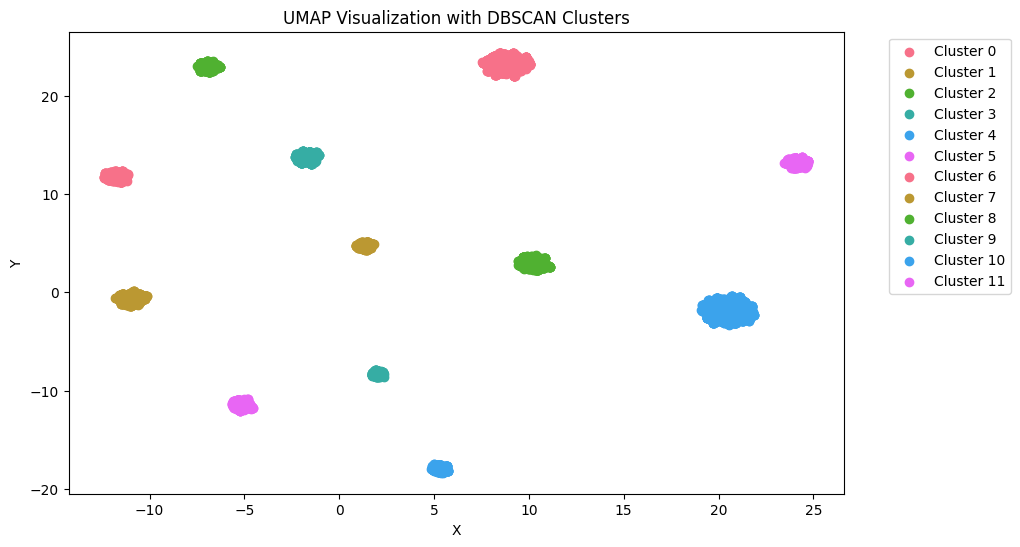

In [51]:
plt.figure(figsize=(10, 6))
ax = plt.gca()

for cluster in sorted(umap_df['cluster'].unique()):
    cluster_data = umap_df[umap_df['cluster'] == cluster]
    plt.scatter(cluster_data['UMAP_1'], cluster_data['UMAP_2'], label=f'Cluster {cluster}')

plt.title('UMAP Visualization with DBSCAN Clusters')
plt.xlabel('X')
plt.ylabel('Y')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

In [52]:
#alternative
reducer = umap.UMAP(n_neighbors=15, n_components=2, metric='euclidean')
umap_result_2 = reducer.fit_transform(cluster_2_df)
umap_df_2 = pd.DataFrame(umap_result_2, columns=['x', 'y'])

In [54]:
umap_df_2['cluster'] = cluster_labels_4
umap_df_2

,x,y,cluster
0,-1.863106,-10.827612,13
1,-1.253489,-10.643640,13
2,-2.652553,-10.881761,13
3,-0.968322,-10.866818,13
4,-0.420954,-11.702574,13
...,...,...,...
7995,9.952709,1.614797,-1
7996,12.473410,-0.971113,-1
7997,11.975517,-0.922287,-1
7998,9.950061,1.613168,-1


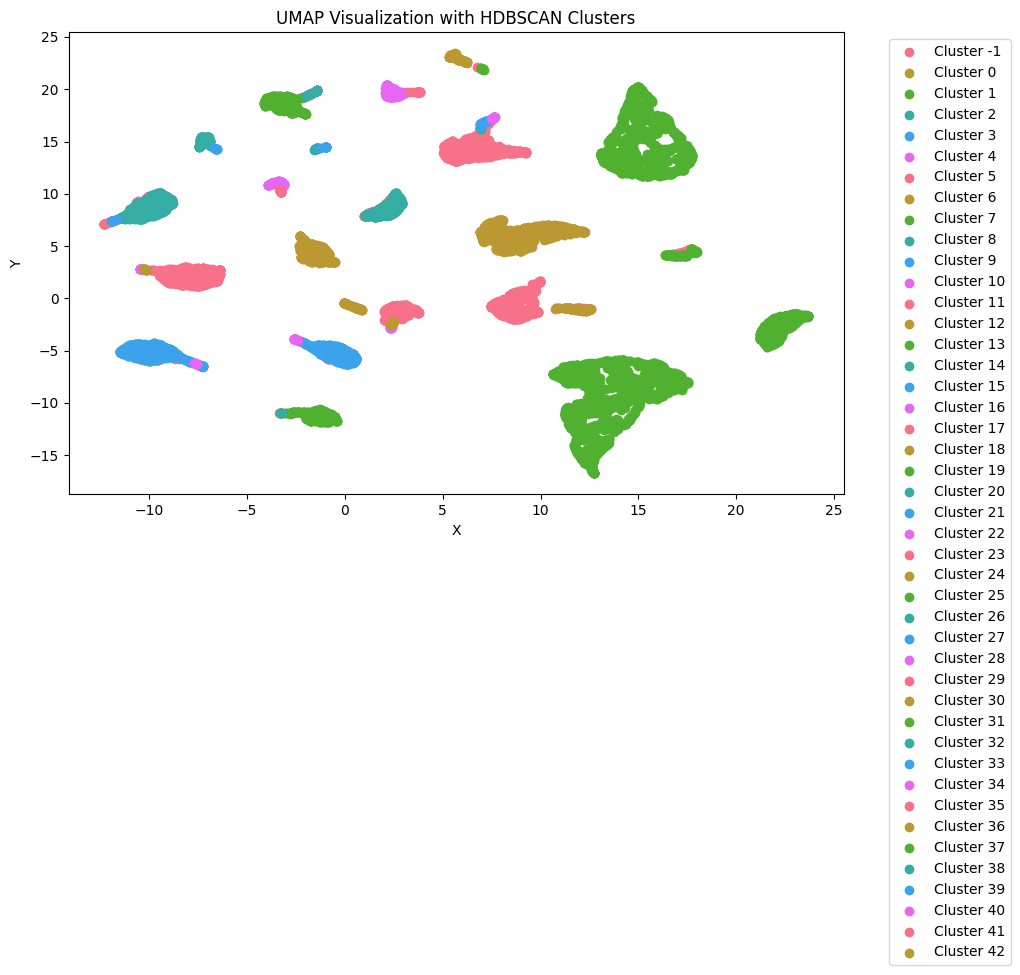

In [57]:
plt.figure(figsize=(10, 6))
ax = plt.gca()

for cluster in sorted(umap_df_2['cluster'].unique()):
    cluster_data = umap_df_2[umap_df_2['cluster'] == cluster]
    plt.scatter(cluster_data['x'], cluster_data['y'], label=f'Cluster {cluster}')

plt.title('UMAP Visualization with HDBSCAN Clusters')
plt.xlabel('X')
plt.ylabel('Y')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()